In [1]:
import tinyphysics
from tinyphysics import TinyPhysicsModel, TinyPhysicsSimulator, CONTROL_START_IDX
from controllers import pid, zero
from matplotlib import pyplot as plt
import seaborn as sns
import pid_with_genome as pg
from hashlib import md5

sns.set_theme()


c:\Users\kenbl\Desktop\comma\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_rollout(sim):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(sim.target_lataccel_history, label="Target Lateral Acceleration", alpha=0.5)
    ax.plot(sim.current_lataccel_history, label="Actual Lateral Acceleration", alpha=0.5)
    ax.legend()
    ax.set_xlabel("Step")
    ax.set_ylabel("Lateral Acceleration")
    ax.set_title("Rollout")
    plt.show()

In [3]:
# model = TinyPhysicsModel("./models/tinyphysics.onnx", debug=True)
# controller0 = zero.Controller()
# controller1 = pid.Controller()

In [4]:
# sim0 = TinyPhysicsSimulator(model, "./data/00000.csv", controller=controller0, debug=False)
# sim0.rollout()
# sim1 = TinyPhysicsSimulator(model, "./data/00000.csv", controller=controller1, debug=False)
# sim1.rollout()

In [5]:
# plot_rollout(sim1)

{'lataccel_cost': 1.254163860417862, 'jerk_cost': 33.72647996220924, 'total_cost': 96.43467298310233}


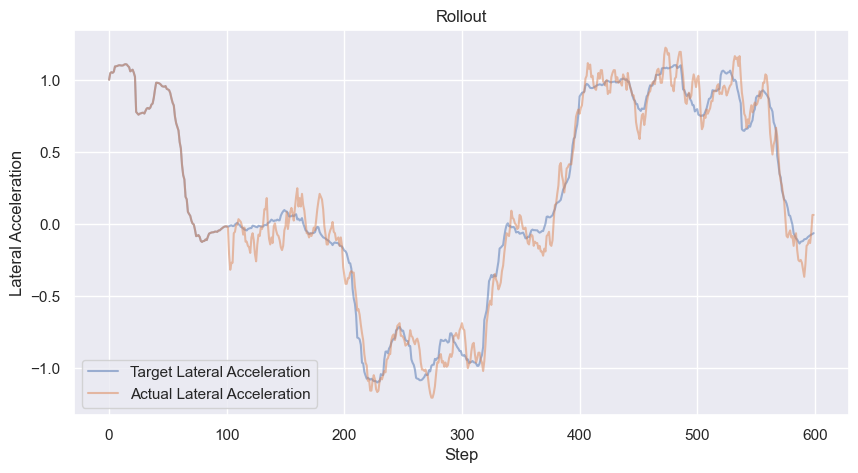

In [6]:
model = TinyPhysicsModel("./models/tinyphysics.onnx", debug=True)
# controller2 = pid.PIDController(p=0.12, i=0.115, d=-0.04, scale=1, imax=1)
controller2 = pid.PIDController(p=0.12, i=0.115, d=0.005, scale=1, imax=1)
sim2 = TinyPhysicsSimulator(model, "./data/00000.csv", controller=controller2, debug=False)
print(sim2.rollout())
plot_rollout(sim2)

In [9]:
model = TinyPhysicsModel("./models/tinyphysics.onnx", debug=True)
# controller2 = pid.PIDController(p=0.12, i=0.115, d=-0.04, scale=1, imax=1)
controller3 = pid.PID4Controller(p=0.12, i=0.115, d=0.005, d2=-0.0008, scale=1, imax=1)
sim3 = TinyPhysicsSimulator(model, "./data/00000.csv", controller=controller3, debug=False)
print(sim3.rollout())
# plot_rollout(sim3)

{'lataccel_cost': 1.2221965032489077, 'jerk_cost': 32.92660462972484, 'total_cost': 94.03642979217022}


In [8]:
data_path = "data\\00000.csv"
model = tinyphysics.TinyPhysicsModel("./models/tinyphysics.onnx", debug=True)
controller3 = pid.PID4Controller(p=0.12, i=0.115, d=0.005, d2=-0.0008, scale=1, imax=1)
sim3 = tinyphysics.TinyPhysicsSimulator(model, data_path=data_path, controller=controller3, debug=False)
seed = int(md5(str(data_path).encode()).hexdigest(), 16) % 10**4
tinyphysics.np.random.seed(seed)
print(sim3.rollout())
# plot_rollout(sim3)

{'lataccel_cost': 1.4811971557249013, 'jerk_cost': 31.54238923398836, 'total_cost': 105.60224702023342}
